In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [17]:
glass1 = pd.read_csv('I:\Assigment - Data Science\KNN\glass.csv')

In [18]:
glass1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [19]:
X = glass1.iloc[:,0:8]
Y = glass1.iloc[:,-1]

In [20]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00
...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57


In [21]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [22]:
num_fold = 10
kfold = KFold(n_splits = 10)


In [34]:
model = KNeighborsClassifier(n_neighbors = 17)
results = cross_val_score(model,X,Y,cv = kfold)

In [35]:
print(results.mean())

0.4329004329004329


## Search for Algorithm tuning

In [25]:
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [26]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [27]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid = param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [29]:
print(grid.best_score_)
print(grid.best_params_)

0.6498338870431895
{'n_neighbors': 1}


##### Visualizing the CV results

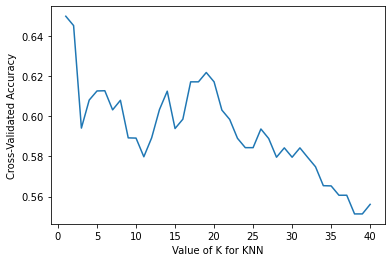

In [31]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [36]:
zoo1 = pd.read_csv('I:\Assigment - Data Science\KNN/zoo.csv')

In [37]:
zoo1

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [51]:
num_fold = 20
kfold = KFold(n_splits = 20)


In [52]:
model = KNeighborsClassifier(n_neighbors = 17)
results = cross_val_score(model,X,Y,cv = kfold)

In [53]:
print(results.mean())

0.5559090909090909


In [54]:
##Search for Algorithm tuning

In [55]:
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [56]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [57]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid = param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [58]:
print(grid.best_score_)
print(grid.best_params_)

0.6498338870431895
{'n_neighbors': 1}


Visualizing the CV results

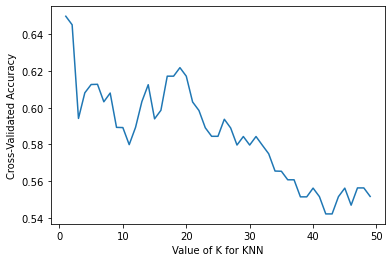

In [59]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 50)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()